## Interpolating octahedral GRIB data

#### Interpolation

In [1]:
from earthkit.regrid import interpolate
from earthkit.data import from_source

# Get octahedral reduced Gaussian GRIB data containing two fields.
ds = from_source(
    "url", 
    "https://sites.ecmwf.int/repository/earthkit-regrid/examples/O32_multi.grib2")

# the target grid is a global 5x5 degree regular latitude-longitude grid
out_grid = {"grid": [5,5]}

# perform interpolation for each field and add results 
# to a new fieldlist stored in memory
r = interpolate(ds, out_grid=out_grid, method="linear")

d = r.data()
lat = d[0]
lon = d[1]
vals = d[2:]
lat.shape, lon.shape, vals.shape

O32_multi.grib2:   0%|          | 0.00/31.4k [00:00<?, ?B/s]

/var/folders/93/w0p869rx17q98wxk83gn9ys40000gn/T/ipykernel_42716/3238100047.py:14: DeprecatedWarning: interpolate is deprecated as of 0.5.0. Use regrid() instead
  r = interpolate(ds, out_grid=out_grid, method="linear")


5fdd9c3402f0cf19230cee238701e9654c0bd21cdde98318f5b92394735f46c5.npz:   0%|          | 0.00/37.2k [00:00<?, ?B…

((37, 72), (37, 72), (2, 37, 72))

In [2]:
lat[:3, 0], lon[:3, 0], vals[0, :3, 0]

(array([90., 85., 80.]),
 array([0., 0., 0.]),
 array([251.78068542, 250.66488784, 248.92256676]))

#### Plotting the results

/Users/cgr/venv/mir/lib/python3.13/site-packages/earthkit/plots/components/subplots.py:727: UserWarning: `plot` is deprecated. Use `quickplot` instead.
  warnings.warn("`plot` is deprecated. Use `quickplot` instead.")
/Users/cgr/venv/mir/lib/python3.13/site-packages/earthkit/plots/components/subplots.py:727: UserWarning: `plot` is deprecated. Use `quickplot` instead.
  warnings.warn("`plot` is deprecated. Use `quickplot` instead.")


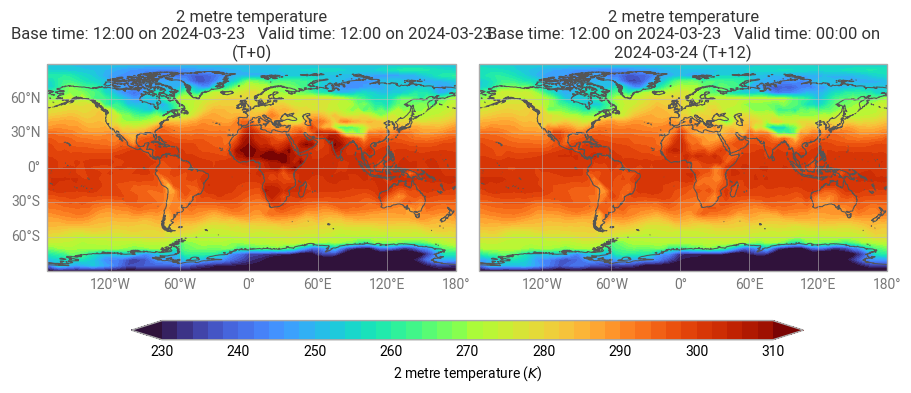

In [3]:
import earthkit.plots

figure = earthkit.plots.Figure(size=(9, 6), rows=1, columns=2)
figure.add_map().plot(r[0])
figure.add_map().plot(r[1])
figure.coastlines()
figure.subplot_titles()
figure.legend()
figure.gridlines(sharey=True)
figure.show()

#### Converting the results to xarray

In [4]:
r.to_xarray()

<xarray.Dataset> Size: 44kB
Dimensions:    (step: 2, latitude: 37, longitude: 72)
Coordinates:
  * step       (step) timedelta64[ns] 16B 00:00:00 12:00:00
  * latitude   (latitude) float64 296B 90.0 85.0 80.0 75.0 ... -80.0 -85.0 -90.0
  * longitude  (longitude) float64 576B 0.0 5.0 10.0 15.0 ... 345.0 350.0 355.0
Data variables:
    2t         (step, latitude, longitude) float64 43kB ...
Attributes:
    param:        2t
    paramId:      167
    class:        od
    stream:       oper
    levtype:      sfc
    type:         fc
    expver:       0001
    date:         20240323
    time:         1200
    domain:       g
    Conventions:  CF-1.8
    institution:  ECMWF

#### Writing the results to disk

Write the resulting fieldlist to disk:

In [5]:
out_file = "_res_O32_to_5x5.grib"
r.save(out_file)

/var/folders/93/w0p869rx17q98wxk83gn9ys40000gn/T/ipykernel_42716/1305914581.py:2: DeprecatedWarning: save is deprecated as of 0.13.0. Use to_target() instead
  r.save(out_file)
